#  this is for train data

In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

In [70]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [72]:
features_with_na= [features for features in train.columns if train[features].isnull().sum() > 1]

for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing value')

LotFrontage 0.1774  % missing value
Alley 0.9377  % missing value
MasVnrType 0.0055  % missing value
MasVnrArea 0.0055  % missing value
BsmtQual 0.0253  % missing value
BsmtCond 0.0253  % missing value
BsmtExposure 0.026  % missing value
BsmtFinType1 0.0253  % missing value
BsmtFinType2 0.026  % missing value
FireplaceQu 0.4726  % missing value
GarageType 0.0555  % missing value
GarageYrBlt 0.0555  % missing value
GarageFinish 0.0555  % missing value
GarageQual 0.0555  % missing value
GarageCond 0.0555  % missing value
PoolQC 0.9952  % missing value
Fence 0.8075  % missing value
MiscFeature 0.963  % missing value


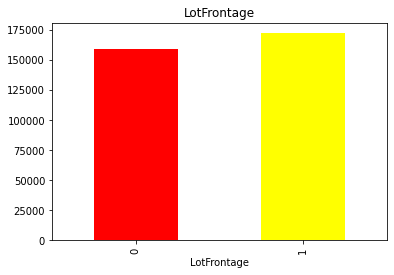

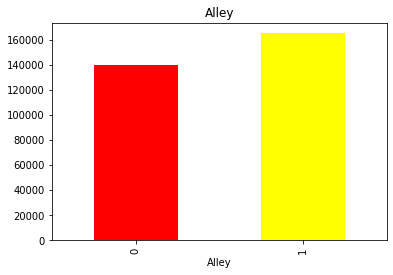

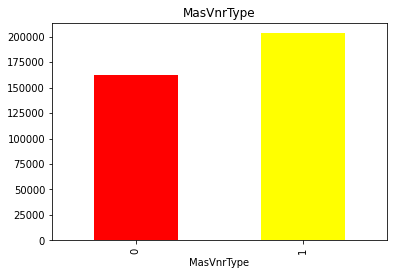

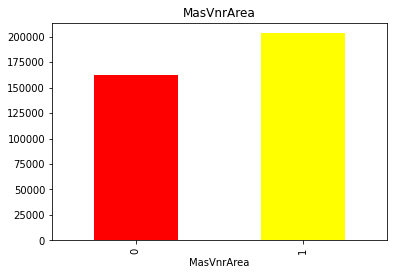

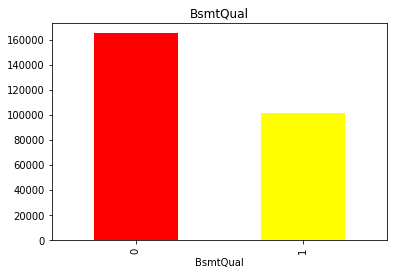

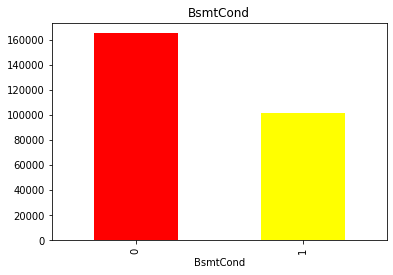

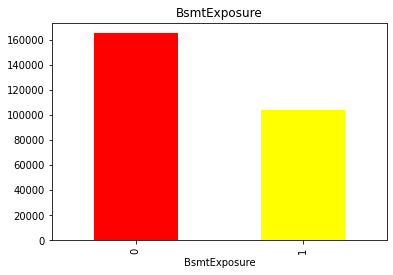

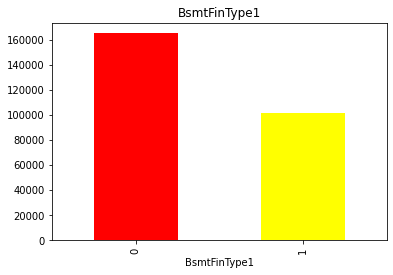

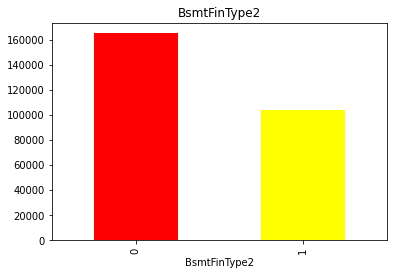

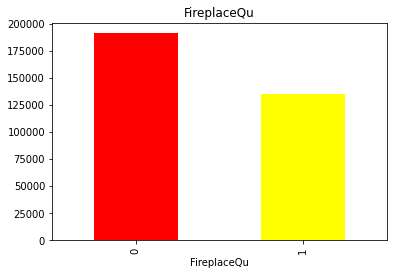

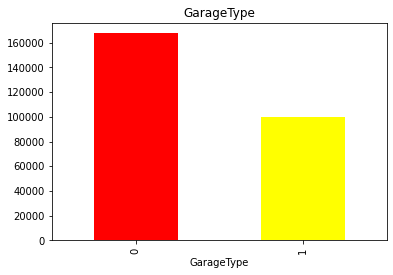

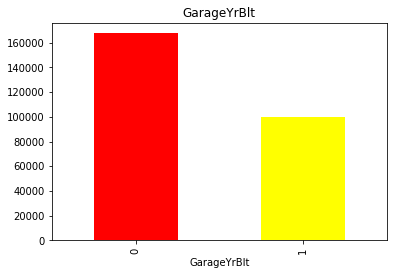

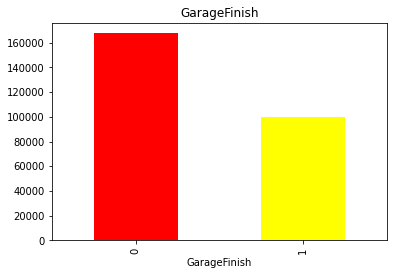

KeyboardInterrupt: 

In [73]:
for feature in features_with_na:
    train_copy= train.copy()
    
    #feature with NaN value 1 and not NaN is 0
    train_copy[feature]= np.where(train_copy[feature].isnull(), 1, 0)
    
    train_copy.groupby(feature)['SalePrice'].median().plot.bar(color=['red', 'yellow'])
    plt.title(feature)
    plt.show()
    

### Wherever the NaN is more, the plot has, higher sales price.. so NaN is important and need to be converted to something meaningful....Point to NOTE

### Here the relation b/t missing values and dependent variable(sale price) is clearly visible so replace the NaN with something meaningful...

In [ ]:
len(train.Id) #since Ids are unique we don't require them in our training..

In [ ]:
numeric_feature= [feature for feature in train.columns if train[feature].dtype!= 'O']
len(numeric_feature)            #all the features that are not OBJECT type...

#all the features with only NUMERIC VALUES are in there...
train[numeric_feature].head(5)

In [ ]:
year_feature= [feature for feature in numeric_feature if 'Yr' in feature or 'Year' in feature]
year_feature #all the features name which has Year value in it...

In [ ]:
train.head()

In [ ]:
train_copy= train.groupby('YrSold')
# train_copy.groupby('YrSold')
train_copy.first()

### Let's see if there is any relation b/t YrSold and Sales Price... @dataAnalysis

In [ ]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Yr Sold')
plt.ylabel('Median House Price')
plt.title("House price vs Year sold")

##### So we can see the price is going down with Year which is little weird as price should go up with time...so let's find some more information on this...

In [ ]:
# so now let's compare the difference all YEAR  feature with Sale Price...YrBuild, YrRemoldAdd, GarageYrBuild..

for feature in year_feature:
    if feature != 'YrSold':
        
        train_copy= train.copy()
        train_copy[feature]= train_copy['YrSold'] - train_copy[feature]
        
        plt.scatter(train_copy[feature], train_copy['SalePrice'])
        plt.xlabel(feature + ' years ago')
        plt.ylabel('Sales Price')
        plt.show()

####  jo late mai bna hai ya late mai remold hua hai compared to recent years unka price kam hai recent years wale se...

In [ ]:
# numeric variables are of 2 types:
#   -continuos variables  -discrete variables(fixed set of intergers)

discrete_feature= [feature for feature in numeric_feature if len(train[feature].unique()) < 25 and feature not in year_feature + ['Id']]
print(len(discrete_feature))
discrete_feature

### Discrete Variable 

In [ ]:
# now find relationship b/t discrete variables and Sales Price...

for feature in discrete_feature:
    train_copy= train.copy()
    
    cmap = plt.cm.tab10
    colors = cmap(np.arange(len(train_copy)) % cmap.N)
    train_copy.groupby(feature)['SalePrice'].median().plot.bar(color=colors)
    
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.title(feature)
    plt.show()
        

###  Continuos Variable

In [ ]:
continuous_feature= [feature for feature in numeric_feature if feature not in discrete_feature + year_feature + ['Id']]
print(len(continuous_feature))
continuous_feature

In [ ]:
# now analyse continuos values using Histographs..as histographs are suitable for continuos values...

for feature in continuous_feature:
    train_copy= train.copy()
    train_copy[feature].hist(bins= 25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

#### we saw data are not normally distributed but are skewed..only the last data is a somewhat normally distributed ...so  all  to normally distribute the data....                                                             

In [ ]:
#we'll use logarithmic transformation...

for feature in continuous_feature:
    copied= train.copy()
    if 0 in copied[feature].unique(): #writing it to ignore log(0) case..which will be not defined...
        pass
    else:
        copied[feature]= np.log(copied[feature])
        copied['SalePrice']= np.log(copied['SalePrice'])
        plt.scatter(copied[feature], copied['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.title(feature)
        plt.show()


####  Now there's a monotonic distribution...the sales price increases with increase in feature...this is possible after applying LOG function...

## Outliers

In [ ]:
for feature in continuous_feature:
    copied= train.copy()
    if 0 in copied[feature].unique():
        pass
    else:
        copied[feature]= np.log(copied[feature])
        copied.boxplot(column= feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

####  the black ones are all outliers...

## Categorical Variables...

In [ ]:
categorical_feature= [feature for feature in train.columns if train[feature].dtype== 'O']
categorical_feature

In [ ]:
train[categorical_feature].head()

In [ ]:
for feature in categorical_feature:
    print('The feature is {} and number of categories are {}' .format(feature, len(train[feature].unique())))

In [ ]:
# relation b/t diff categorical feature and sales price..

for feature in categorical_feature:
    train_copy= train.copy()
    
#     cmap = plt.cm.tab10
#     colors = cmap(np.arange(len(train_copy)) % cmap.N)
    train_copy.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.title(feature)
    plt.show()

#  Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(train, train['SalePrice'], test_size=0.1, random_state=0)

### Replace NaN values

In [ ]:
#finding categorical features with NaN values...

feature_nan= [feature for feature in train.columns if train[feature].isnull().sum()> 1 and train[feature].dtype == 'O']
feature_nan

In [ ]:
# fill with a missing label...

def fill_missing(train, feature_nan):
    copied= train.copy()
    copied[feature_nan]= copied[feature_nan].fillna('Missing')
    return copied

train= fill_missing(train, feature_nan)

train[feature_nan].isnull().sum()

In [ ]:
train.head()

In [ ]:
#finding numeric features with NaN values

num_nan= [features for features in train.columns if train[features].dtype != 'O' and train[features].isnull().sum() > 1]

train[num_nan].isnull().sum()

In [ ]:
#replace numeric NaN values with median or mode...

for feature in num_nan:
    median_it= train[feature].median()
    
    train[feature + '_nan']= np.where(train[feature].isnull(), 1, 0)

    train[feature].fillna(median_it, inplace= True)
    
train[num_nan].isna().sum()

In [ ]:
train.head()

In [ ]:
# now convert temporal features(date time ones) to how may years instead of the exact year...
# like yrBuilt hojayega..in how many years it was built..so yrSold - yrBuilt

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    train[feature]= train['YrSold'] - train[feature]

train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].head()

In [ ]:
train.head()

In [ ]:
numeric_feature

In [ ]:
#now taking those num. features as most of them are skwed and not in gaussian and only those num. features which doesn't have 0 values in it..skipping the 0 values num. featuers..

#all skewed and not in gaussian and not have 0 values in them....
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    train[feature]= np.log(train[feature])

In [ ]:
train.head()

In [ ]:
categorical_feature

#### now do not take rare categorical values which are less present are not gonna do much help to the result
#### so we make a new category for rare ones and keep them seperate...

In [ ]:
for feature in categorical_feature:
    temp= train.groupby(feature)['SalePrice'].count()/len(train) 
    temp_df= temp[temp > 0.01].index  #if my temp % is >0.01 then take index... 
    train[feature]= np.where(train[feature].isin(temp_df), train[feature], 'Rare_var')

In [ ]:
train.head(50)

In [ ]:
for feature in categorical_feature:
    labels_ordered=train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train[feature]=train[feature].map(labels_ordered)
labels_ordered

In [ ]:
train.head()

## Feature scaling

In [ ]:
feature_scale=[feature for feature in train.columns if feature not in ['Id', 'SalePrice']]

from sklearn.preprocessing  import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(train[feature_scale])

In [ ]:
data= pd.concat([train[['Id', 'SalePrice']].reset_index(drop=True), 
                    pd.DataFrame(scaler.transform(train[feature_scale]),columns=feature_scale)],
                    axis= 1)

In [ ]:
data.head()

In [ ]:
data.to_csv('x_train.csv', index=False)

###  do same steps for test data as well

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [ ]:
dataset= pd.read_csv('x_train.csv')

In [ ]:
dataset.head()

In [ ]:
y_train= dataset['SalePrice']
y_train.head()

In [ ]:
x_train=dataset.drop(['Id', 'SalePrice'], axis= 1)
x_train.head()

In [ ]:
# using Lasso Regression and we must select an alpha value(equivalent to penalty) for it...
# The bigger the alpha the less feature will be selected...so keep it low...

# then use SelectFromModel to select features whose coefficient are non-Zero...

#SelectFromModel and estimator given is Lasso....
feature_sel_model= SelectFromModel(Lasso(alpha= 0.005, random_state= 0)) #keep same value random state for test value as well...
feature_sel_model.fit(x_train, y_train)

In [ ]:
feature_sel_model.get_support() # True means that feature is imp. and false one are not imp. and can be skipped...

In [ ]:
# now getting all the true value features i.e., the imp. features...

selected_feat= x_train.columns[(feature_sel_model.get_support())]

print('total features {}'.format(x_train.shape[1]))
print('selected features {}'.format(len(selected_feat)))

In [ ]:
selected_feat

In [ ]:
x_train[selected_feat].head()

In [ ]:
x_train= x_train[selected_feat]

In [ ]:
x_train.head()

#  Starting a Fresh

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

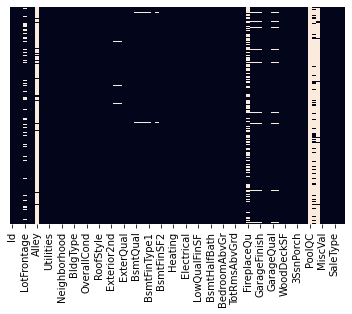

In [5]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False)

In [6]:
df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].mean()) 

In [7]:
df['BsmtCond']= df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']= df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']= df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']= df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']= df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']= df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']= df['GarageCond'].fillna(df['GarageCond'].mode()[0])


In [8]:
df.drop(['Alley'], axis= 1, inplace= True)
df.drop(['GarageYrBlt'], axis= 1, inplace= True)
df.drop(['PoolQC', 'Fence', 'MiscFeature'], axis= 1, inplace= True)

In [9]:
df.shape

(1460, 76)

<AxesSubplot:>

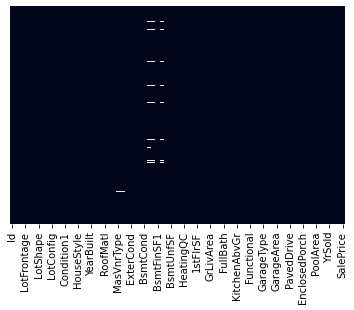

In [10]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False)

In [11]:
pd.options.display.max_rows = 4000
df.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


<AxesSubplot:>

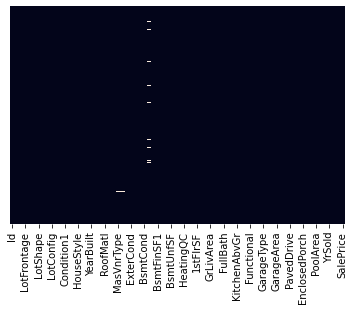

In [12]:
df['BsmtFinType2']= df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtFinType1']= df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
sns.heatmap(df.isnull(), yticklabels= False, cbar= False)

<AxesSubplot:>

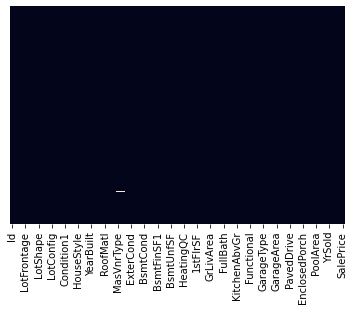

In [13]:
df['BsmtExposure']= df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['Electrical']= df['Electrical'].fillna(df['Electrical'].mode()[0])
sns.heatmap(df.isnull(), yticklabels= False, cbar= False)

<AxesSubplot:>

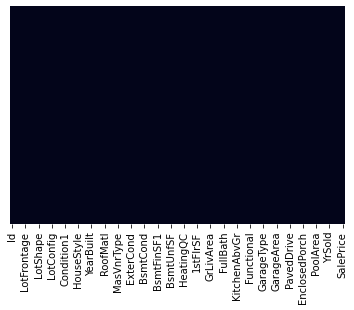

In [14]:
df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['MasVnrType']= df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
sns.heatmap(df.isnull(), yticklabels= False, cbar= False)

In [15]:
df.shape

(1460, 76)

In [16]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [17]:
main_df= df.copy()

In [18]:
test_df= pd.read_csv('cleaned_test.csv')

In [19]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [20]:
test_df.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF         False
LowQualFinS

In [21]:
test_df.shape

(1459, 74)

In [22]:
main_df.shape

(1460, 76)

In [23]:
final_df= pd.concat([df, test_df], axis=0)

In [24]:
final_df.shape

(2919, 76)

In [25]:
cat_columns= [feature for feature in df.columns if df[feature].dtype == 'O']
len(cat_columns)

39

In [26]:
def category_onehot_multcol(multcolumns):
    df_final= final_df
    i=0
    for feature in multcolumns:
        print(feature)
        df1= pd.get_dummies(final_df[feature], drop_first= True)
            
        final_df.drop([feature], axis= 1, inplace= True)
        if i==0:
            df_final= df1.copy()
            
        else:
            df_final= pd.concat([df_final, df1], axis= 1)
            
        i=i+1
    df_final= pd.concat([df_final, final_df], axis= 1)
    
    return df_final

In [27]:
final_df= category_onehot_multcol(cat_columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [28]:
final_df.shape

(2919, 237)

In [29]:
final_df.head()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,1,0,0,1,0,0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,0,0,1,0,1,0,0,1,0,0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,0,0,1,0,1,0,0,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,0,0,1,0,1,0,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,0,0,1,0,1,0,0,0,0,0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [30]:
 final_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False, False,  True,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True,  True,

In [31]:
final_df= final_df.loc[ : , ~final_df.columns.duplicated()]

In [32]:
final_df.head()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,1,0,0,1,0,0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,0,0,1,0,1,0,0,1,0,0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,0,0,1,0,1,0,0,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,0,0,1,0,1,0,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,0,0,1,0,1,0,0,0,0,0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [33]:
final_df.shape

(2919, 177)

In [34]:
main_df.shape

(1460, 76)

In [35]:
test_df.shape

(1459, 74)

In [36]:
train= final_df.iloc[:1460, : ]
test= final_df.iloc[1460: , : ]

In [37]:
train.tail()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1455,0,0,1,0,1,0,0,1,0,0,...,0,40,0,0,0,0,0,8,2007,175000.0
1456,0,0,1,0,1,0,0,1,0,0,...,349,0,0,0,0,0,0,2,2010,210000.0
1457,0,0,1,0,1,0,0,1,0,0,...,0,60,0,0,0,0,2500,5,2010,266500.0
1458,0,0,1,0,1,0,0,1,0,0,...,366,0,112,0,0,0,0,4,2010,142125.0
1459,0,0,1,0,1,0,0,1,0,0,...,736,68,0,0,0,0,0,6,2008,147500.0


In [38]:
test.head()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,0,0,1,0,0,1,0,0,...,140,0,0,0,120,0,0,6,2010,NaN
1,0,0,1,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,NaN
2,0,0,1,0,1,0,0,0,0,0,...,212,34,0,0,0,0,0,3,2010,NaN
3,0,0,1,0,1,0,0,0,0,0,...,360,36,0,0,0,0,0,6,2010,NaN
4,0,0,1,0,1,0,0,0,1,0,...,0,82,0,0,144,0,0,1,2010,NaN


In [39]:
test.drop(['SalePrice'], inplace= True, axis= 1)

/home/drack/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
test.head()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,1,0,0,1,0,0,1,0,0,...,730.0,140,0,0,0,120,0,0,6,2010
1,0,0,1,0,1,0,0,0,0,0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,0,0,1,0,1,0,0,0,0,0,...,482.0,212,34,0,0,0,0,0,3,2010
3,0,0,1,0,1,0,0,0,0,0,...,470.0,360,36,0,0,0,0,0,6,2010
4,0,0,1,0,1,0,0,0,1,0,...,506.0,0,82,0,0,144,0,0,1,2010


In [41]:
train.shape

(1460, 177)

In [42]:
test.shape

(1459, 176)

In [43]:
xTrain= train.drop(['SalePrice'], axis= 1)
yTrain= train['SalePrice']

In [44]:
xTrain.head()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,1,0,1,0,0,1,0,0,...,548.0,0,61,0,0,0,0,0,2,2008
1,0,0,1,0,1,0,0,1,0,0,...,460.0,298,0,0,0,0,0,0,5,2007
2,0,0,1,0,1,0,0,0,0,0,...,608.0,0,42,0,0,0,0,0,9,2008
3,0,0,1,0,1,0,0,0,0,0,...,642.0,0,35,272,0,0,0,0,2,2006
4,0,0,1,0,1,0,0,0,0,0,...,836.0,192,84,0,0,0,0,0,12,2008


In [45]:
yTrain.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [46]:
xTrain.shape, yTrain.shape

((1460, 176), (1460,))

In [91]:
import xgboost
classifier= xgboost.XGBRegressor()
classifier.fit(xTrain, yTrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [48]:
y_pred= classifier.predict(test)

In [49]:
y_pred

array([127730.875, 158653.28 , 188268.03 , ..., 167142.67 , 119869.805,
       226992.5  ], dtype=float32)

In [50]:
pred= pd.DataFrame(y_pred)

In [51]:
pred.head()

,0
0,127730.875000
1,158653.281250
2,188268.031250
3,193319.062500
4,190672.359375


In [52]:
sub_df= pd.read_csv('sample_submission.csv')
dataset= pd.concat([sub_df['Id'], pred], axis =1)
dataset.columns= ['Id', 'SalePrice']

In [53]:
dataset.head()

,Id,SalePrice
0,1461,127730.875000
1,1462,158653.281250
2,1463,188268.031250
3,1464,193319.062500
4,1465,190672.359375


In [54]:
dataset.to_csv('final_submission.csv', index= False)

In [55]:
#hyper-parameter tuning...

n_estimator= [100, 500, 900, 1100, 1500]
max_depth= [2, 3, 5, 10, 15]
booster= ['gbtree', 'gblinear']
learning_rate= [0.05, 0.1, 0.15, 0.20]
min_child_weight= [1,2,3,4]
base_score= [0.25, 0.5, 0.75, 1]

#define grid of hyper-parameter

hyperparameter_grid= {
    'n_estimators': n_estimator,
    'max_depth': max_depth,
    'booster': booster,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'base_score': base_score
}

In [92]:
#randomisedsearchCV with 4-fold cross validation

from sklearn.model_selection import RandomizedSearchCV

regressor= xgboost.XGBRegressor()

random_cv= RandomizedSearchCV(estimator= regressor, 
            param_distributions= hyperparameter_grid, cv= 5, n_iter= 50,
            scoring= 'neg_mean_absolute_error', n_jobs= 4, verbose= 5,
            return_train_score= True, random_state= 42)



In [93]:
random_cv.fit(xTrain, yTrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [94]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [101]:
regressor= xgboost.XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=1, missing=1,
             monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, subsample=1, seed=None)

In [102]:
regressor.fit(xTrain, yTrain)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=1, missing=1,
             monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [103]:
test.head()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,1,0,0,1,0,0,1,0,0,...,730.0,140,0,0,0,120,0,0,6,2010
1,0,0,1,0,1,0,0,0,0,0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,0,0,1,0,1,0,0,0,0,0,...,482.0,212,34,0,0,0,0,0,3,2010
3,0,0,1,0,1,0,0,0,0,0,...,470.0,360,36,0,0,0,0,0,6,2010
4,0,0,1,0,1,0,0,0,1,0,...,506.0,0,82,0,0,144,0,0,1,2010


In [104]:
y_pred= regressor.predict(test)

In [105]:
y_pred

array([121371.74, 164340.72, 187253.06, ..., 171238.53, 111534.09,
       228057.48], dtype=float32)

In [106]:
pred= pd.DataFrame(y_pred)
sub_df= pd.read_csv('sample_submission.csv')
datasets= pd.concat([sub_df['Id'], pred], axis= 1)
datasets.columns=['Id', 'SalePrice']
datasets.to_csv('final_submission2.csv', index= False)